In [1]:
from plot_utils import mxticks

In [2]:
from utils import deg2rad
import numpy as np

In [3]:
heading = deg2rad(np.linspace(-180, 180, 361))
pitch = deg2rad(np.linspace(-45, 45, 91))
H, P = np.meshgrid(heading, pitch)

In [4]:
from simulate import oceanstokes
stokes80 = oceanstokes(0, deg2rad(90 - 80), H, P)
stokes45 = oceanstokes(0, deg2rad(90 - 45), H, P)
stokes10 = oceanstokes(0, deg2rad(90 - 10), H, P)

In [44]:
import scipy.io

In [46]:
scipy.io.savemat('stokes.mat', {"foo":stokes80})

In [7]:
from utils import wrap
from polarization import Stokes
from matplotlib import colors
def stokes_to_rgb(s, ss=0.9, vs=0.2):
        a = wrap(Stokes.aop(s, -1), 0, np.pi)
        p = Stokes.dolp(s, -1)
        sm, vm = 1 - ss, 1 - vs
        rgb = colors.hsv_to_rgb(np.stack((a / np.pi, ss * p + sm, vs * p + vm), axis=-1))
        return rgb, a, p

In [8]:
rgb80, aop80, dolp80 = stokes_to_rgb(stokes80, 1, 0)
rgb45, aop45, dolp45 = stokes_to_rgb(stokes45, 1, 0)
rgb10, aop10, dolp10 = stokes_to_rgb(stokes10, 1, 0)

In [9]:
quiver_opts = {'pivot': 'mid', 'scale_units': 'x', 'scale': 0.1, 'headlength': 0, 'headwidth': 1, 'width': 0.003}

In [40]:
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.imshow(rgb80, origin='lower', extent=(-180, 180, -45, 45))
from plot_utils import mxticks
from plot_utils import myticks
plt.quiver(np.rad2deg(heading[::45]), np.rad2deg(pitch[5::20]), np.cos(aop80[5::20, ::45]), np.sin(aop80[5::20, ::45]), **quiver_opts)
mxticks(np.linspace(-180, 180, 9), labels='')
myticks(np.linspace(-40, 40, 5), labels='{:.0f}\xB0')
from plot_utils import tickparams
tickparams(length=0)

In [41]:
plt.subplot(312)
plt.ylabel('Detector Pitch')
plt.imshow(rgb45, origin='lower', extent=(-180, 180, -45, 45))
plt.quiver(np.rad2deg(heading[::45]), np.rad2deg(pitch[5::20]), np.cos(aop45[5::20, ::45]), np.sin(aop45[5::20, ::45]), **quiver_opts)
mxticks(np.linspace(-180, 180, 9), labels='')
myticks(np.linspace(-40, 40, 5), labels='{:.0f}\xB0')
tickparams(length=0)

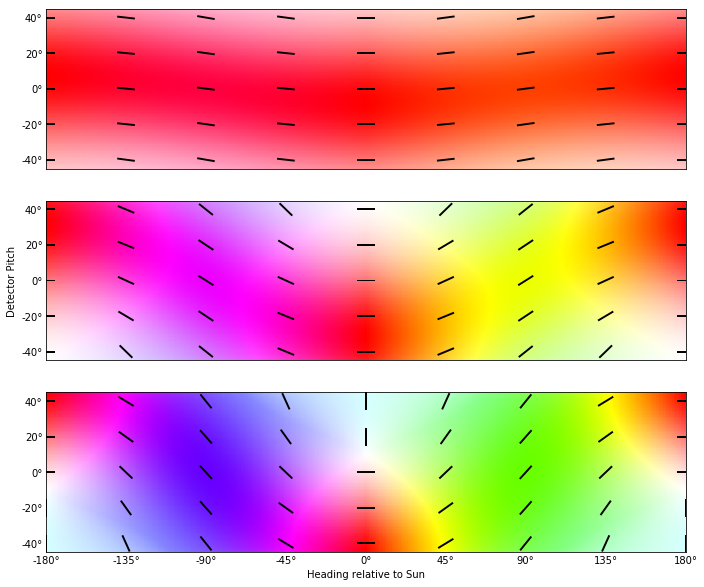

In [42]:
plt.subplot(313)
plt.imshow(rgb10, origin='lower', extent=(-180, 180, -45, 45))
plt.quiver(np.rad2deg(heading[::45]), np.rad2deg(pitch[5::20]), np.cos(aop10[5::20, ::45]), np.sin(aop10[5::20, ::45]), **quiver_opts)
mxticks(np.linspace(-180, 180, 9), labels='{:.0f}\xB0')
myticks(np.linspace(-40, 40, 5), labels='{:.0f}\xB0')
tickparams(length=0)
plt.xlabel('Heading relative to Sun')
plt.show()